In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.model_selection
import sklearn.linear_model
import sklearn.preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.ion()

from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel

# Importing the data and extracting the most relevant features!

In [2]:
pp = pd.read_csv('pre_process_flight.csv')

In [3]:
pp.shape

(10682, 167)

In [4]:
pp.head(4)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Total_Stops,week_day,month_day,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_in_min,priceUSD
0,0,0,1,0,0,0,0,0,0,0,...,0,6,24,3,22,20,1,10,170,55.0
1,1,0,0,0,0,0,0,0,0,0,...,2,2,1,5,5,50,13,15,445,107.0
2,0,0,0,1,0,0,0,0,0,0,...,2,6,9,6,9,25,4,25,1140,194.0
3,0,0,1,0,0,0,0,0,0,0,...,1,6,12,5,18,5,23,30,325,87.0


In [5]:
features = pp.columns[:-1]
features

Index(['Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara',
       ...
       'Route_MAA → CCU', 'Total_Stops', 'week_day', 'month_day', 'month',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'duration_in_min'],
      dtype='object', length=166)

In [6]:
X = pp[features]
Y = pp['priceUSD']

In [25]:
# feature selection
estimator = ExtraTreesRegressor(n_estimators=100, random_state = 42)
estimator = estimator.fit(pp[features], Y)
model = SelectFromModel(estimator, prefit=True)
new = features[model.get_support()]
new.shape

(21,)

In [26]:
X = pp[new]
Y = pp['priceUSD']

In [9]:
seed = 101
test_ratio = 0.3
X_train, X_test, Y_train, Y_test =  sklearn.model_selection.train_test_split(X, Y, test_size=test_ratio, random_state=seed)

# Using the Linear Regressor as an estimator

## Training a Linear Regressor

In [10]:
linReg = LinearRegression()
linReg.fit(X_train, Y_train)

LinearRegression()

In [11]:
predictions = linReg.predict(X_test)

## Visualizing the Linear Regressor performance and better understanding the model

### a - Visualizing its performance

In [12]:
xmin= np.minimum(Y_test.min(), predictions.min() )-10
xmax= np.maximum(Y_test.max(), predictions.max() )+10
ymin= np.minimum(Y_test.min(), predictions.min() )-10
ymax= np.maximum(Y_test.max(), predictions.max() )+10

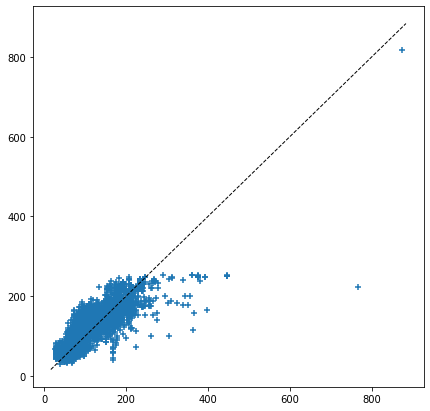

In [13]:
fig = plt.figure(figsize = (7, 7))
plt.scatter(Y_test,predictions, marker='+')
plt.plot([xmin,xmax], [ymin,ymax], lw=1, color='k', ls='--')

### b - Comparign Metrics

In [14]:
# Calcul du score r2 des prédictions du test
MSE = metrics.mean_squared_error(Y_test, predictions)
RMSE = np.sqrt(MSE)
EP = RMSE /np.mean(Y_test) #quantifie le pourcentage d'erreur des prédictions du test

print('MSE:', MSE)
print('RMSE:', RMSE)
print("Accuracy: {0:.2%}".format(1-EP))

MSE: 1225.2260511092766
RMSE: 35.00322915259786
Accuracy: 72.42%


In [15]:
np.mean(np.abs(predictions-Y_test))

24.31136559273699

### c - Understanding the importance of each feature for the model

<AxesSubplot:>

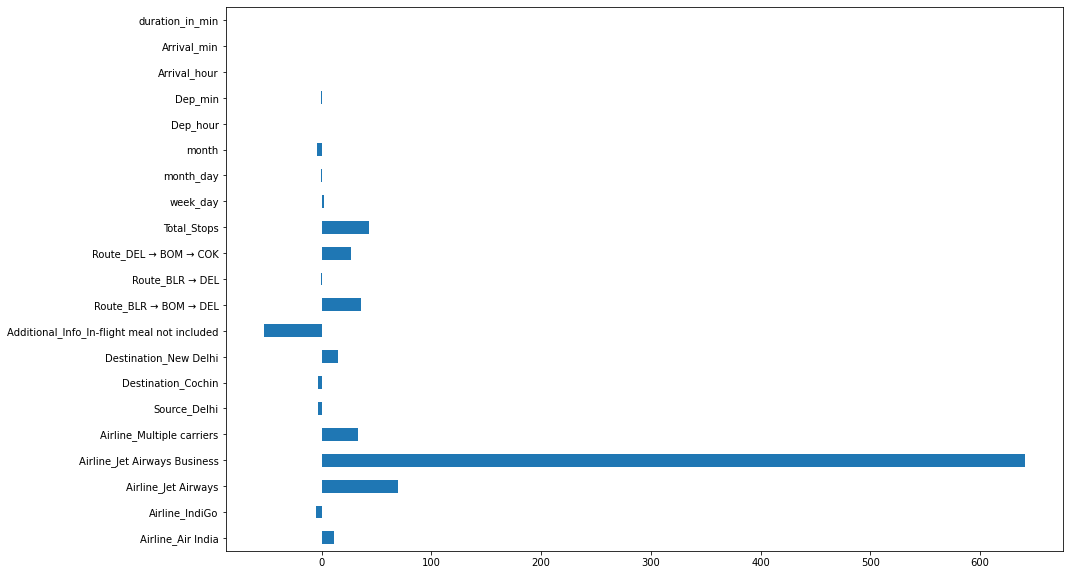

In [16]:
plt.figure(figsize=(15,10))
feat_imp = pd.Series(linReg.coef_, index=X.columns)
feat_imp.plot(kind='barh')

# Using the Decision Tree estimator

In [17]:
#Déclaration de l'arbre de décision
tree = DecisionTreeRegressor(random_state = 35)
#Entrainement de l'abre de décision 
tree.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=35)

In [18]:
# Utilise la méthode de preédiction des arbres de décisions sur le test set
predictions = tree.predict(X_test)

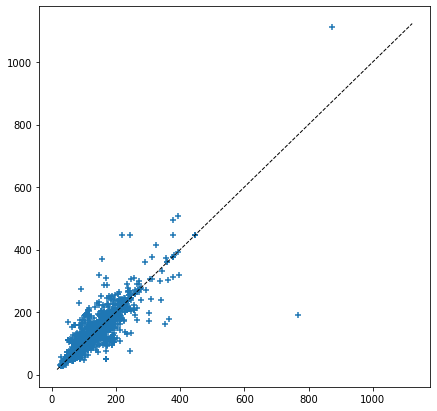

In [19]:
# Trace le graphe des vrais prix en fonctions des prédictions et la bissectrice des valeurs théoriques

xmin= np.minimum(Y_test.min(), predictions.min() )-10
xmax= np.maximum(Y_test.max(), predictions.max() )+10
ymin= np.minimum(Y_test.min(), predictions.min() )-10
ymax= np.maximum(Y_test.max(), predictions.max() )+10

fig = plt.figure(figsize = (7, 7))
plt.scatter(Y_test,predictions, marker='+')
plt.plot([xmin,xmax], [ymin,ymax], lw=1, color='k', ls='--')

In [20]:
# Calcul du score r2 des prédictions du test
MSE = metrics.mean_squared_error(Y_test, predictions)
RMSE = np.sqrt(MSE)
EP = RMSE /np.mean(Y_test) #quantifie le pourcentage d'erreur des prédictions du test

print('MSE:', MSE)
print('RMSE:', RMSE)
print('r2_score: {0:.2%}'.format(metrics.r2_score(Y_test, predictions)))
print("Accuracy: {0:.2%}".format(1-EP))

MSE: 660.014449297972
RMSE: 25.690746374871477
r2_score: 83.47%
Accuracy: 79.76%


In [21]:
# Renvoie l'écart moyen du prix entre le test et les prédictions
np.mean(np.abs(predictions-Y_test))

10.711461258450337

## I - Hyper-Parameter tuning

In [22]:
tree = DecisionTreeRegressor(random_state = 35)
path = tree.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = np.abs(ccp_alphas)

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

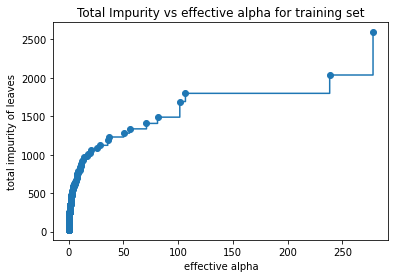

In [23]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [24]:
trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeRegressor(random_state=35, ccp_alpha=ccp_alpha)
    tree.fit(X_train, Y_train)
    trees.append(tree)
    
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      trees[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 1651.3248742784317


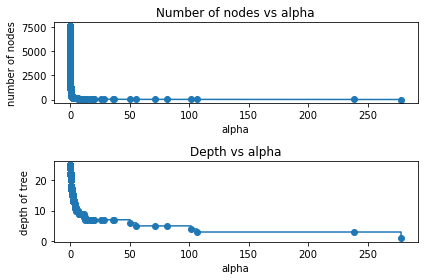

In [25]:
trees = trees[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [tree.tree_.node_count for tree in trees]
depth = [tree.tree_.max_depth for tree in trees]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

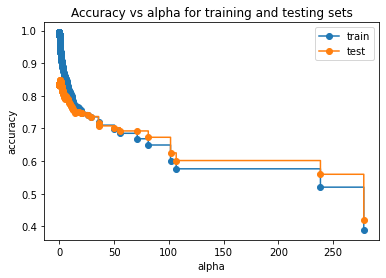

In [26]:
train_scores = [tree.score(X_train, Y_train) for tree in trees]
test_scores = [tree.score(X_test, Y_test) for tree in trees]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

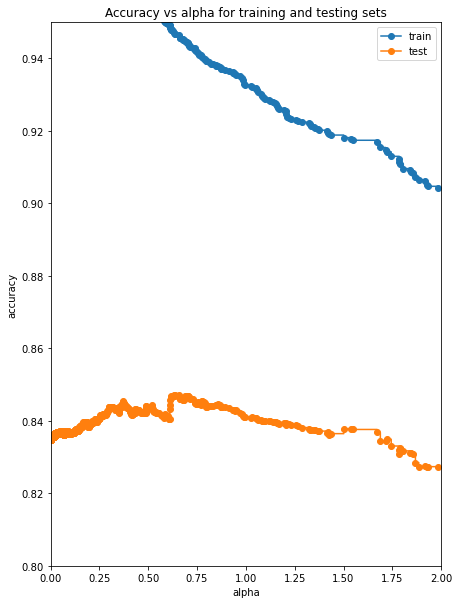

In [27]:
fig, ax = plt.subplots(figsize = (7, 10))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.xlim(0,2)
plt.ylim(0.8,0.95)
plt.show()

In [28]:
np.max(test_scores)

0.8472145747621449

In [29]:
a = ccp_alphas[np.argmax(test_scores)]

In [30]:
maxDepth = depth[np.argmax(test_scores)]

## II - Visualizing the Decision Trees performance and better understanding the model

### a - Training a Decision Tree with the best parameter found

In [31]:
#Déclaration de l'arbre de décision
tree = DecisionTreeRegressor(ccp_alpha = a, max_depth=maxDepth, random_state = 35)
#Entrainement de l'abre de décision 
tree.fit(X_train, Y_train)
#Affichage de l'abre de décision obtenu après entraînement
#plot_tree(clf, feature_names= features, filled=True)
#plt.show()

DecisionTreeRegressor(ccp_alpha=0.6594445187463833, max_depth=20,
                      random_state=35)

In [32]:
predictions = tree.predict(X_test)

### b - Visualizing its performance

In [33]:
xmin= np.minimum(Y_test.min(), predictions.min() )-10
xmax= np.maximum(Y_test.max(), predictions.max() )+10
ymin= np.minimum(Y_test.min(), predictions.min() )-10
ymax= np.maximum(Y_test.max(), predictions.max() )+10

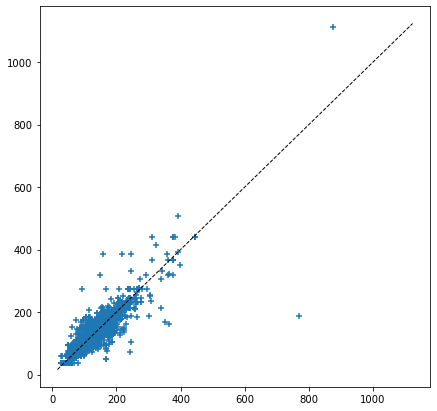

In [34]:
fig = plt.figure(figsize = (7, 7))
plt.scatter(Y_test,predictions, marker='+')
plt.plot([xmin,xmax], [ymin,ymax], lw=1, color='k', ls='--')

### c - Metrics Comparaison

In [35]:
# Calcul du score r2 des prédictions du test
MSE = metrics.mean_squared_error(Y_test, predictions)
RMSE = np.sqrt(MSE)
EP = RMSE /np.mean(Y_test) #quantifie le pourcentage d'erreur des prédictions du test

print('MSE:', MSE)
print('RMSE:', RMSE)
print("Accuracy: {0:.2%}".format(1-EP))

MSE: 595.5457436298271
RMSE: 24.40380592509757
Accuracy: 80.77%


In [36]:
np.mean(np.abs(predictions-Y_test))

13.451872968468201

In [37]:
tree.score(X_train, Y_train)

0.9463851510699093

### d - Understanding the importance of each feature for the Decision Tree model

<AxesSubplot:>

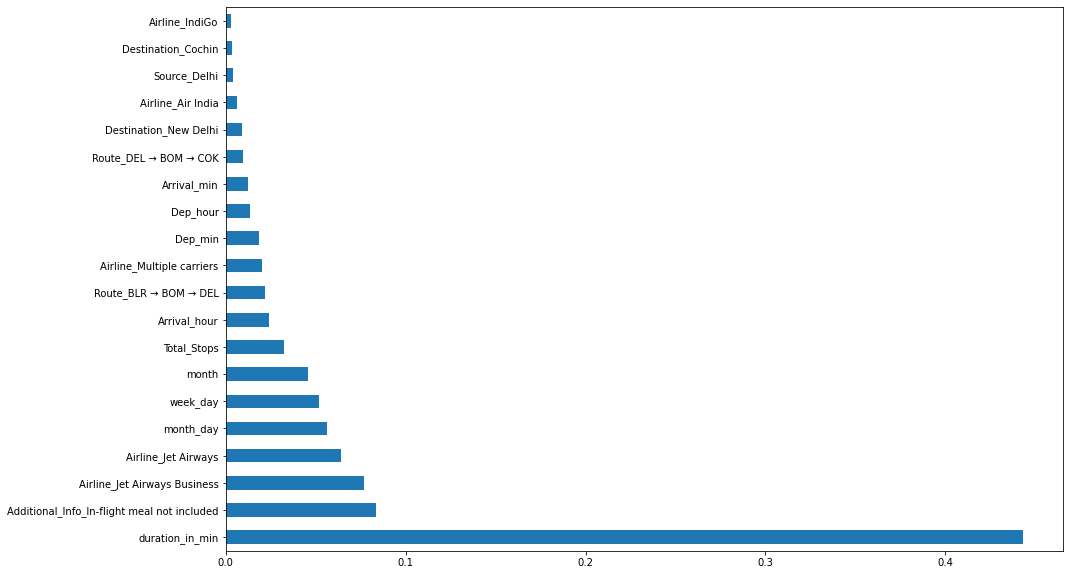

In [38]:
plt.figure(figsize=(15,10))
feat_imp = pd.Series(tree.feature_importances_, index=X.columns)
feat_imp.nlargest(20).plot(kind='barh')

# Using the Random Forest estimators

In [39]:
rfr=RandomForestRegressor(random_state = 35, max_depth = 20)

In [40]:
rfr.fit(X_train,Y_train)

RandomForestRegressor(max_depth=20, random_state=35)

In [41]:
predictions=rfr.predict(X_test)

Text(0.5, 1.0, 'Plotting prediction against true value')

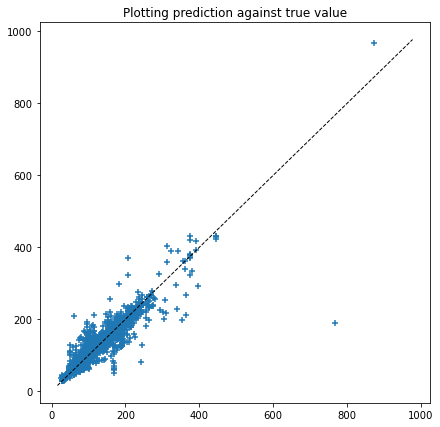

In [42]:
xmin= np.minimum(Y_test.min(), predictions.min() )-10
xmax= np.maximum(Y_test.max(), predictions.max() )+10
ymin= np.minimum(Y_test.min(), predictions.min() )-10
ymax= np.maximum(Y_test.max(), predictions.max() )+10

fig = plt.figure(figsize = (7, 7))
plt.scatter(Y_test,predictions, marker='+')
plt.plot([xmin,xmax], [ymin,ymax], lw=1, color='k', ls='--')
plt.title("Plotting prediction against true value")

In [43]:
# Calcul du score r2 des prédictions du test
MSE = metrics.mean_squared_error(Y_test, predictions)
RMSE = np.sqrt(MSE)
EP = RMSE /np.mean(Y_test) #quantifie le pourcentage d'erreur des prédictions du test

print('MSE:', MSE)
print('RMSE:', RMSE)
print('r2_score: {0:.2%}'.format(metrics.r2_score(Y_test, predictions)))
print("Accuracy: {0:.2%}".format(1-EP))

MSE: 422.12431258951835
RMSE: 20.54566408246563
r2_score: 89.43%
Accuracy: 83.81%


In [44]:
# Renvoie l'écart moyen du prix entre le test et les prédictions
np.mean(np.abs(predictions-Y_test))

9.386503690411832

## I - Hyper-Parameter tuning

###  a - Finding the best number of estimators for the Random Forest estimator

In [45]:
num_estimators = np.arange(1, 200 + 10, 10)

In [46]:
scores_train = []
scores_test = []

In [47]:
for n in num_estimators:
    #rfr=RandomForestRegressor(n_estimators= n,max_depth=20,random_state = 35)
    rfr=RandomForestRegressor(n_estimators= n,random_state = 35)
    rfr.fit(X_train,Y_train)
    scores_test.append(rfr.score(X_test, Y_test))
    scores_train.append(rfr.score(X_train, Y_train))

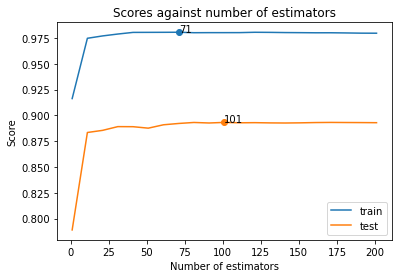

In [48]:
plt.plot(num_estimators, scores_train, label = 'train')
plt.plot(num_estimators, scores_test, label = 'test')
plt.scatter(num_estimators[np.argmax(scores_train)], np.max(scores_train))
plt.text(num_estimators[np.argmax(scores_train)], np.max(scores_train), "{}".format(num_estimators[np.argmax(scores_train)]))
plt.scatter(num_estimators[np.argmax(scores_test)], np.max(scores_test))
plt.text(num_estimators[np.argmax(scores_test)], np.max(scores_test), "{}".format(num_estimators[np.argmax(scores_test)]))
plt.xlabel("Number of estimators")
plt.ylabel("Score")
plt.title("Scores against number of estimators")
plt.legend()
plt.show()

Preferring generality, we settle on the number of estimators giving us the maximum score for the test set. Thus our number of estimator is now 101

### b- Finding the best number of features to use

In [49]:
num_features = np.arange(1, 22)

In [50]:
scores_train = []
scores_test = []

In [51]:
for n in num_features:
    rfr=RandomForestRegressor(n_estimators= 101,max_depth=20, max_features = n,random_state = 35)
    rfr.fit(X_train,Y_train)
    scores_test.append(rfr.score(X_test, Y_test))
    scores_train.append(rfr.score(X_train, Y_train))

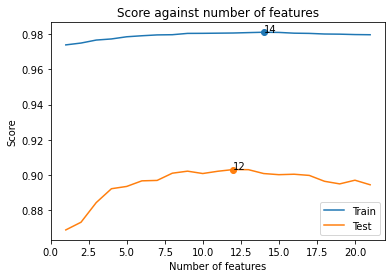

In [52]:
plt.plot(num_features, scores_train, label = 'Train')
plt.plot(num_features, scores_test, label = 'Test')
plt.scatter(num_features[np.argmax(scores_train)], np.max(scores_train))
plt.text(num_features[np.argmax(scores_train)], np.max(scores_train), "{}".format(num_features[np.argmax(scores_train)]))
plt.scatter(num_features[np.argmax(scores_test)], np.max(scores_test))
plt.text(num_features[np.argmax(scores_test)], np.max(scores_test), "{}".format(num_features[np.argmax(scores_test)]))
plt.xlabel("Number of features")
plt.ylabel("Score")
plt.title("Score against number of features")
plt.legend()
plt.show()

Prefering generality, we choose the number of features of the test set. Thus the number of features used by the model is now 12

## II - Visualizing the Random Forest performance and better understanding the model

Based on our hyper parameter search, we define a new model, train it and visualize its perfomance

### a - Training a Random Forest with the best parameters found

In [53]:
rfr=RandomForestRegressor(n_estimators= 101,max_depth=20, max_features= 12,random_state = 35)

In [54]:
# Training the model
rfr.fit(X_train,Y_train)

RandomForestRegressor(max_depth=20, max_features=12, n_estimators=101,
                      random_state=35)

In [55]:
predictions=rfr.predict(X_test)

### b - Visualizing its performance

Text(0.5, 1.0, 'Plotting prediction against true value')

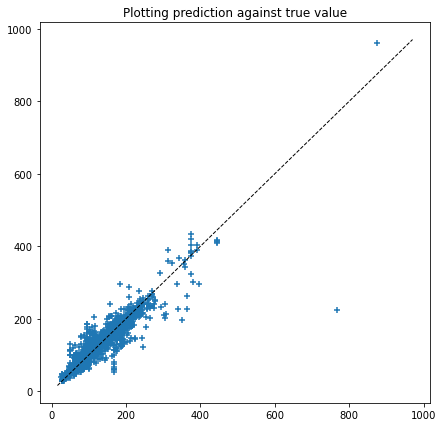

In [56]:
xmin= np.minimum(Y_test.min(), predictions.min() )-10
xmax= np.maximum(Y_test.max(), predictions.max() )+10
ymin= np.minimum(Y_test.min(), predictions.min() )-10
ymax= np.maximum(Y_test.max(), predictions.max() )+10

fig = plt.figure(figsize = (7, 7))
plt.scatter(Y_test,predictions, marker='+')
plt.plot([xmin,xmax], [ymin,ymax], lw=1, color='k', ls='--')
plt.title("Plotting prediction against true value")

### c - Metrics comparaison

In [57]:
# Calcul du score r2 des prédictions du test
MSE = metrics.mean_squared_error(Y_test, predictions)
RMSE = np.sqrt(MSE)
EP = RMSE /np.mean(Y_test) #quantifie le pourcentage d'erreur des prédictions du test

print('MSE:', MSE)
print('RMSE:', RMSE)
print("Accuracy: {0:.2%}".format(1-EP)) 

MSE: 386.7575043801513
RMSE: 19.666151234548952
Accuracy: 84.51%


In [58]:
np.mean(np.abs(predictions-Y_test))

9.47905722186762

### d -  Understanding the importance of each feature for the Random Forest model

<AxesSubplot:title={'center':'Importance of each feature for the Random Forest'}>

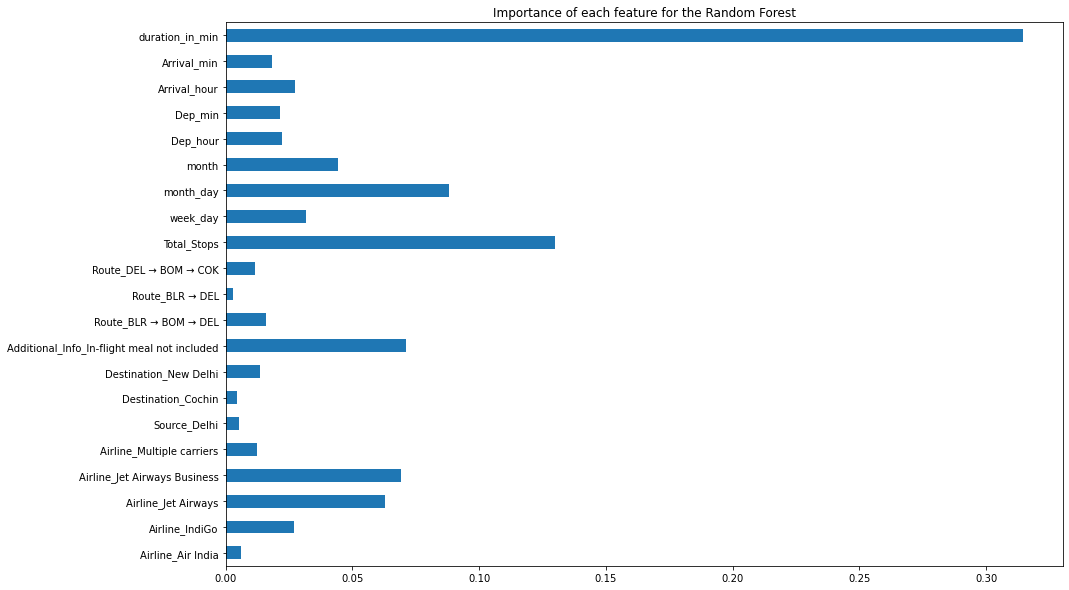

In [59]:
plt.figure(figsize=(15,10))
plt.title("Importance of each feature for the Random Forest")
feat_imp = pd.Series(rfr.feature_importances_, index=X.columns)
feat_imp.plot(kind='barh')